**Predicting Flight delays using Data visulization and Machine learning Techniques**

**IMPORTING LIBRARIES**

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

**Loading the Dataset**

In [3]:
data = pd.read_csv('/content/flights.csv', nrows=150000)#load the data

**Data Overview**

In [4]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2015,1,10,6,EV,4607,N15572,XNA,IAH,1504,...,1735.0,46.0,0,0,NaN,0.0,0.0,0.0,46.0,0.0
149996,2015,1,10,6,WN,4388,N7723E,ATL,DAL,1505,...,1623.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149997,2015,1,10,6,WN,2903,N218WN,ATL,DCA,1505,...,1634.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149998,2015,1,10,6,WN,4519,N436WN,ATL,MCO,1505,...,1627.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Exploratory Data Analysis (EDA)**

**Unique Aircraft and Airlines**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 150000 non-null  int64  
 1   MONTH                150000 non-null  int64  
 2   DAY                  150000 non-null  int64  
 3   DAY_OF_WEEK          150000 non-null  int64  
 4   AIRLINE              150000 non-null  object 
 5   FLIGHT_NUMBER        150000 non-null  int64  
 6   TAIL_NUMBER          149693 non-null  object 
 7   ORIGIN_AIRPORT       150000 non-null  object 
 8   DESTINATION_AIRPORT  150000 non-null  object 
 9   SCHEDULED_DEPARTURE  150000 non-null  int64  
 10  DEPARTURE_TIME       146099 non-null  float64
 11  DEPARTURE_DELAY      146099 non-null  float64
 12  TAXI_OUT             145976 non-null  float64
 13  WHEELS_OFF           145976 non-null  float64
 14  SCHEDULED_TIME       150000 non-null  int64  
 15  ELAPSED_TIME     

In [6]:
#Checking for unique aircraft - most aircraft are unique in this dataset, so we cannot find repeat offenders for delays
tails = data.groupby('TAIL_NUMBER')
tails.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149535,2015,1,10,6,HA,48,N594HA,HNL,OAK,1430,...,129.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
149549,2015,1,10,6,UA,1423,N76054,IAH,EWR,1431,...,2008.0,68.0,0,0,NaN,0.0,0.0,22.0,46.0,0.0
149640,2015,1,10,6,AA,1429,N364AA,MCO,MIA,1439,...,1537.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149762,2015,1,10,6,UA,1061,N26902,DEN,IAH,1450,...,1821.0,15.0,0,0,NaN,0.0,0.0,15.0,0.0,0.0


In [7]:
#Checking for unique aircraft - most aircraft are unique in this dataset, so we cannot find repeat offenders for delays
tails = data.groupby('TAIL_NUMBER')
tails.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149535,2015,1,10,6,HA,48,N594HA,HNL,OAK,1430,...,129.0,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN
149549,2015,1,10,6,UA,1423,N76054,IAH,EWR,1431,...,2008.0,68.0,0,0,NaN,0.0,0.0,22.0,46.0,0.0
149640,2015,1,10,6,AA,1429,N364AA,MCO,MIA,1439,...,1537.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
149762,2015,1,10,6,UA,1061,N26902,DEN,IAH,1450,...,1821.0,15.0,0,0,NaN,0.0,0.0,15.0,0.0,0.0


In [8]:
#Only 140 airlines, so we can use this variable to predict delays once encoded
airlines = data.groupby('AIRLINE')
airlines.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2015,1,1,4,VX,474,N525VA,LAX,LAS,750,...,844.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1564,2015,1,1,4,VX,1493,N855VA,LAS,LAX,800,...,904.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1565,2015,1,1,4,VX,174,N624VA,SFO,EWR,800,...,1559.0,-31.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1566,2015,1,1,4,VX,1930,N838VA,SFO,LAX,800,...,914.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Only 140 airlines, so we can use this variable to predict delays once encoded
airlines = data.groupby('AIRLINE')
airlines.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2015,1,1,4,VX,474,N525VA,LAX,LAS,750,...,844.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1564,2015,1,1,4,VX,1493,N855VA,LAS,LAX,800,...,904.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1565,2015,1,1,4,VX,174,N624VA,SFO,EWR,800,...,1559.0,-31.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1566,2015,1,1,4,VX,1930,N838VA,SFO,LAX,800,...,914.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 150000 non-null  int64  
 1   MONTH                150000 non-null  int64  
 2   DAY                  150000 non-null  int64  
 3   DAY_OF_WEEK          150000 non-null  int64  
 4   AIRLINE              150000 non-null  object 
 5   FLIGHT_NUMBER        150000 non-null  int64  
 6   TAIL_NUMBER          149693 non-null  object 
 7   ORIGIN_AIRPORT       150000 non-null  object 
 8   DESTINATION_AIRPORT  150000 non-null  object 
 9   SCHEDULED_DEPARTURE  150000 non-null  int64  
 10  DEPARTURE_TIME       146099 non-null  float64
 11  DEPARTURE_DELAY      146099 non-null  float64
 12  TAXI_OUT             145976 non-null  float64
 13  WHEELS_OFF           145976 non-null  float64
 14  SCHEDULED_TIME       150000 non-null  int64  
 15  ELAPSED_TIME     

**Correlation Analysis**

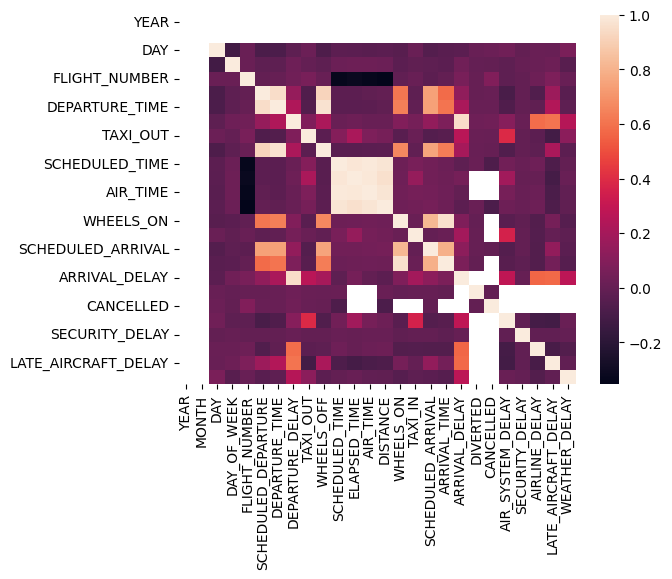

In [11]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation
sns.heatmap(numeric_data.corr());


Remove features with low interpretability or high heteroskedasticity before generating a rudimentary correlation heatmap. For instance, consider removing less relevant variables such as the year (since it may not directly impact day-to-day predictions) and focus on variables like month, which can proxy overall weather conditions.

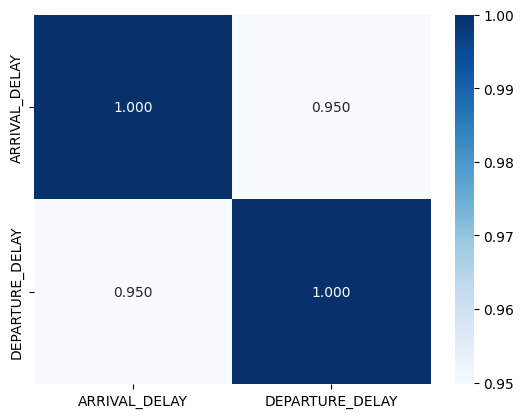

In [12]:
sns.heatmap(data[['ARRIVAL_DELAY','DEPARTURE_DELAY']].corr(), annot=True, cmap='Blues',fmt='.3f');

Acknowledge the sequential relationship between departure delay and arrival delay. Given that departure must precede arrival, it's reasonable to regress and predict departure delay while assuming a carry-on effect on arrival delay for approximately 93% of cases.

**Data Visualization**

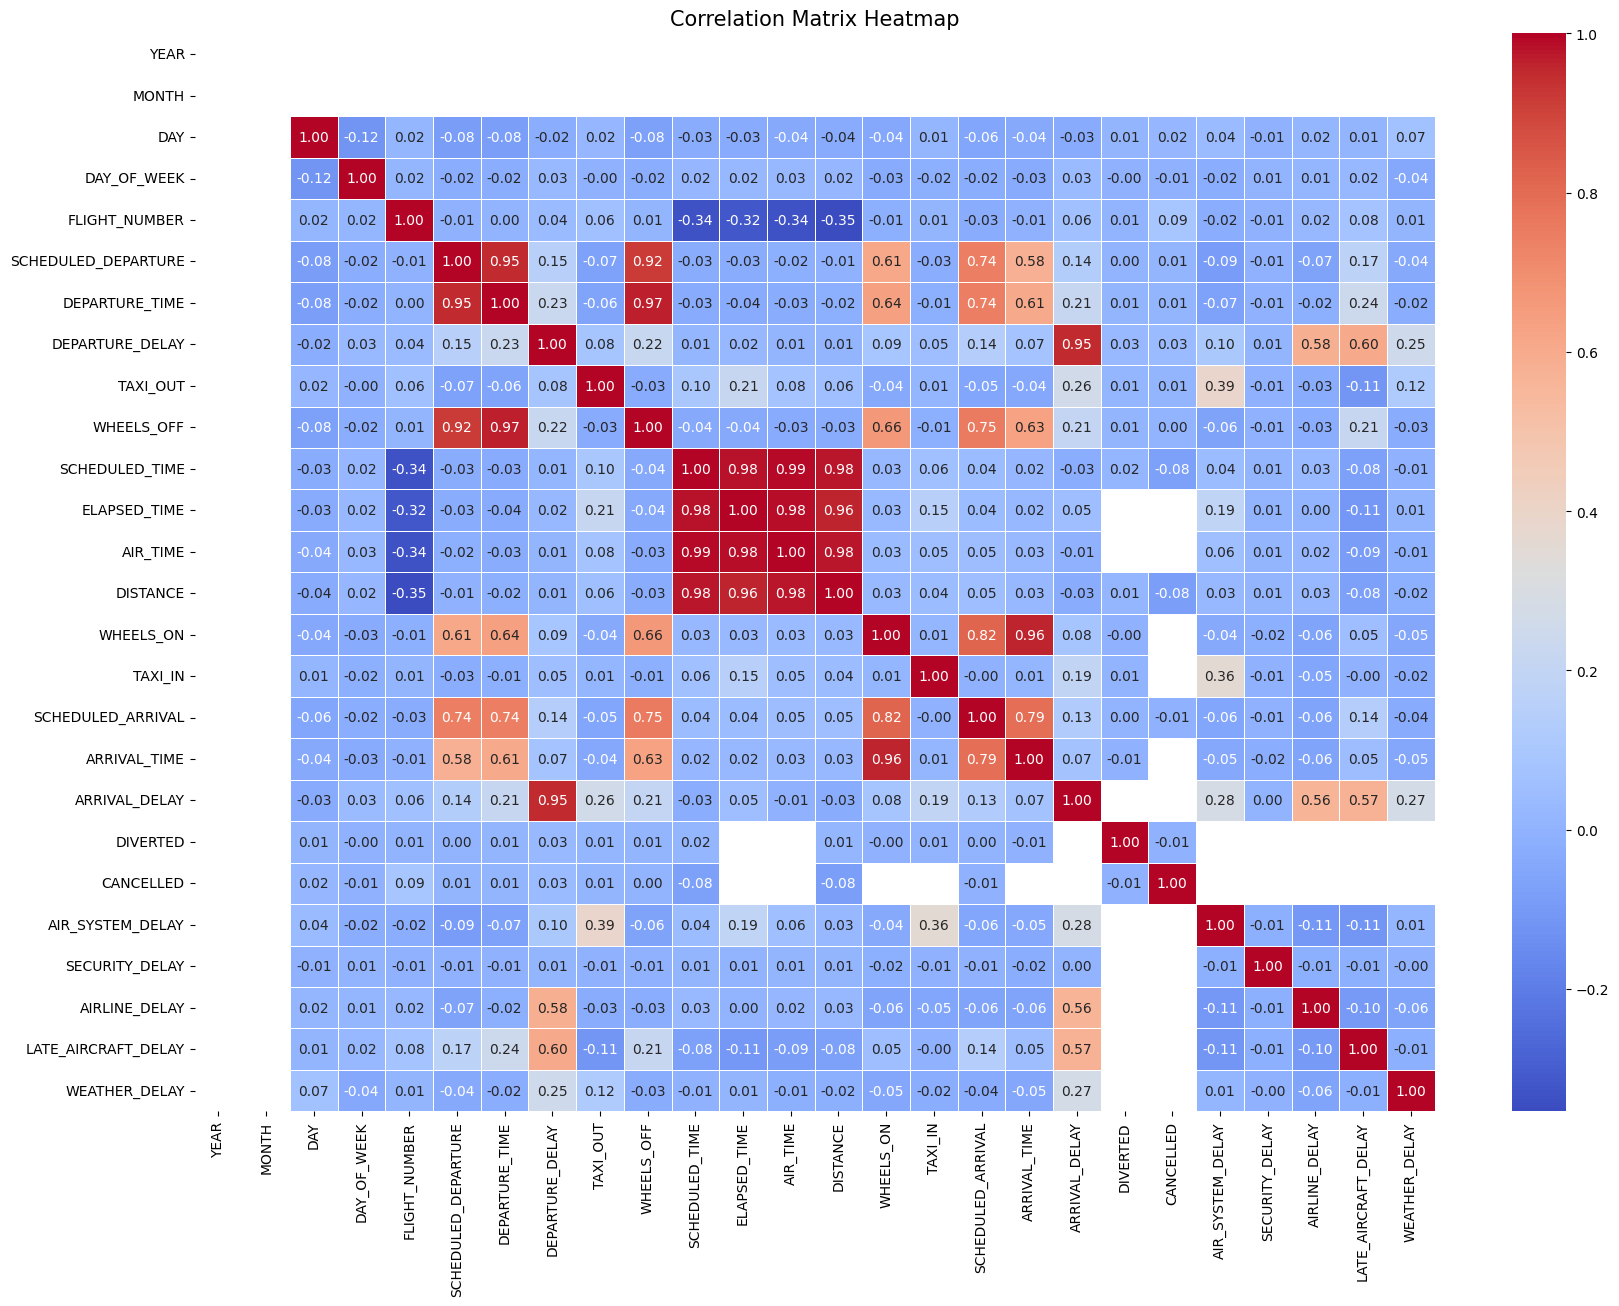

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Plot heatmap with enhanced readability
plt.figure(figsize=(20, 14))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10, }, linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.show()


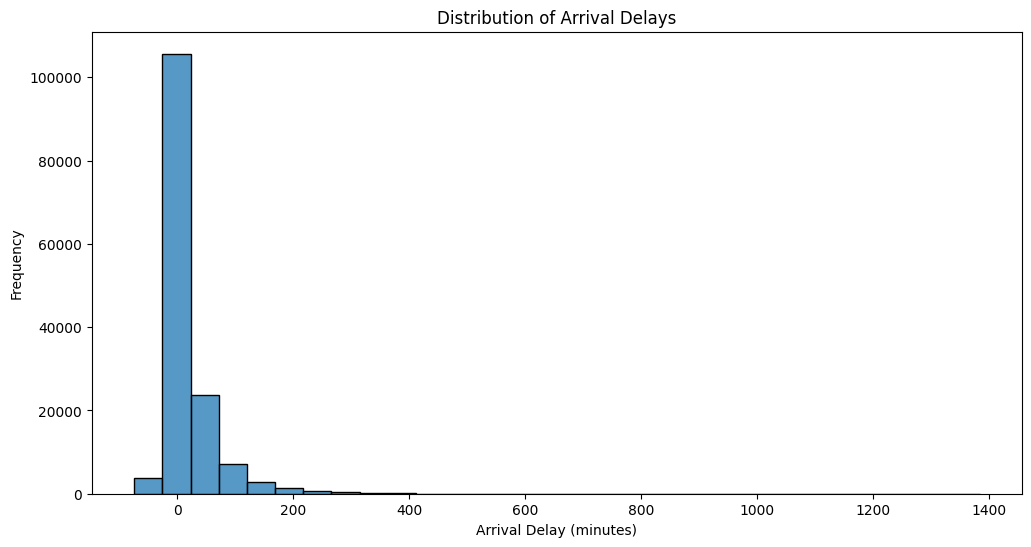

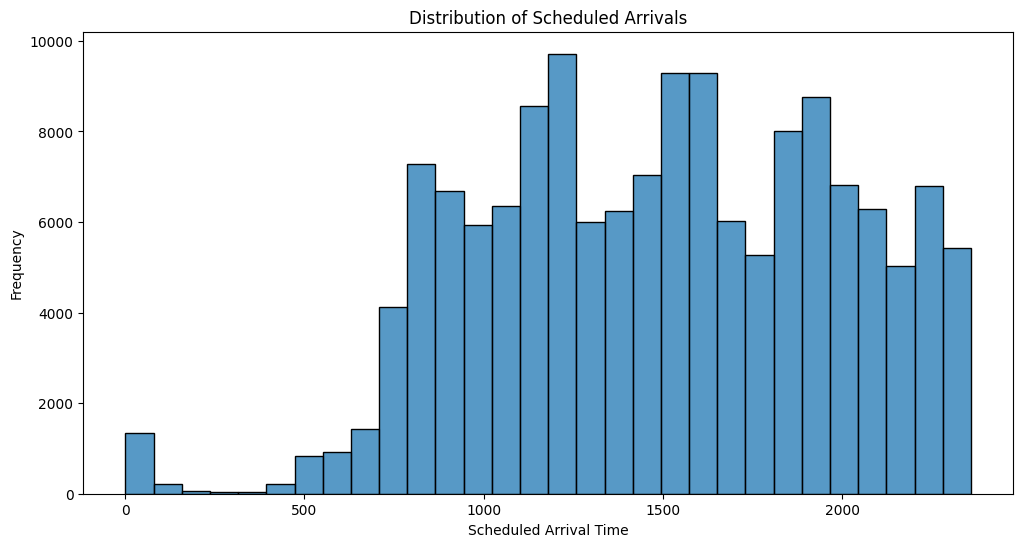

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot for ARRIVAL_DELAY
plt.figure(figsize=(12, 6))
sns.histplot(data['ARRIVAL_DELAY'], bins=30, kde=False)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot for SCHEDULED_ARRIVAL
plt.figure(figsize=(12, 6))
sns.histplot(data['SCHEDULED_ARRIVAL'], bins=30, kde=False)
plt.title('Distribution of Scheduled Arrivals')
plt.xlabel('Scheduled Arrival Time')
plt.ylabel('Frequency')
plt.show()


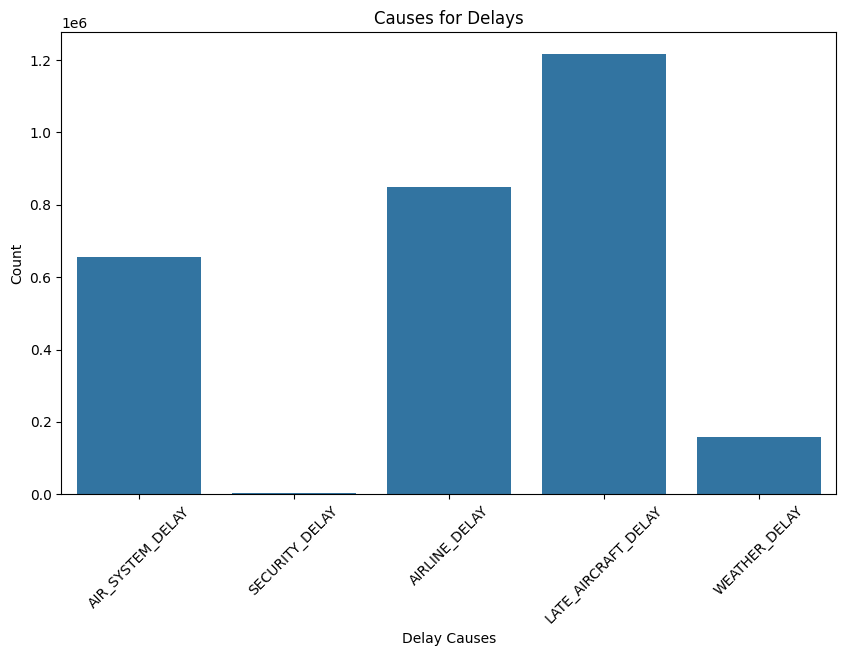

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Causes for delays
delay_causes = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
delay_counts = data[delay_causes].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=delay_counts.index, y=delay_counts.values)
plt.title('Causes for Delays')
plt.xlabel('Delay Causes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Departure Delays by Airport and Airline**

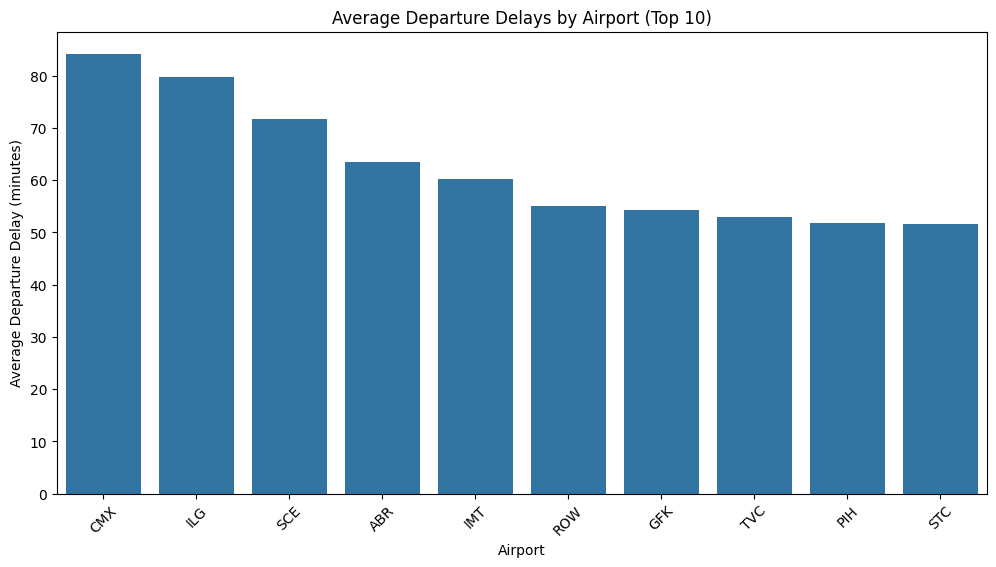

In [16]:
# Departure delays by airport
departure_delays_airport = data.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=departure_delays_airport.index, y=departure_delays_airport.values)
plt.title('Average Departure Delays by Airport (Top 10)')
plt.xlabel('Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

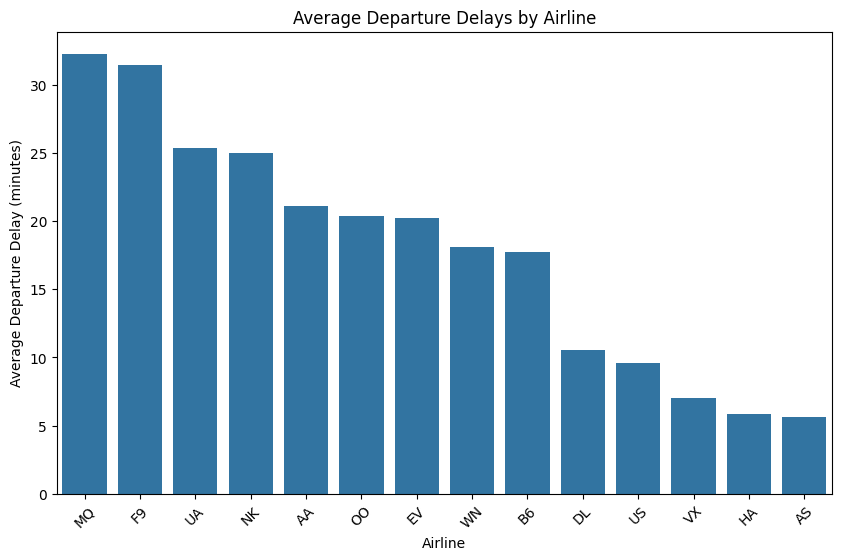

In [17]:
# Departure delays by airlines
departure_delays_airlines = data.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=departure_delays_airlines.index, y=departure_delays_airlines.values)
plt.title('Average Departure Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

**Cancellations by Airlines**

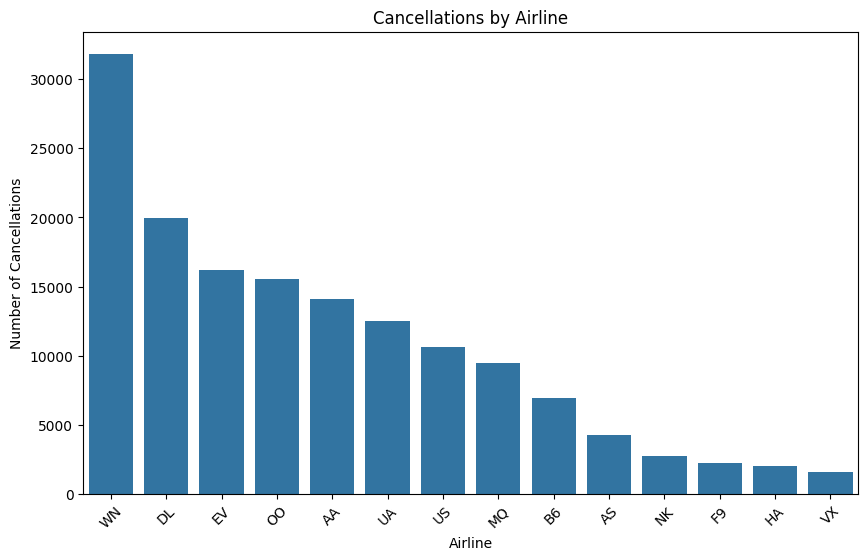

In [18]:
# Cancellations by airlines
cancel_counts_airlines = data['AIRLINE'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancel_counts_airlines.index, y=cancel_counts_airlines.values)
plt.title('Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


In [19]:
data['DEPARTURE_DELAY'].mean()

18.2756829273301

In [20]:
#Very large delays will affect our model significantly since our scale has no negative balance
data.nlargest(10, ['DEPARTURE_DELAY'])

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
35353,2015,1,3,6,AA,1677,N557AA,MEM,DFW,1010,...,1054.0,1384.0,0,0,NaN,4.0,0.0,1380.0,0.0,0.0
51718,2015,1,4,7,AA,1279,N496AA,OMA,DFW,1100,...,937.0,1237.0,0,0,NaN,0.0,0.0,1222.0,15.0,0.0
6371,2015,1,1,4,AA,2470,N5CAAA,BOS,DFW,1315,...,1246.0,1201.0,0,0,NaN,11.0,0.0,1169.0,21.0,0.0
71273,2015,1,5,1,AA,1495,N5FSAA,EGE,DFW,1355,...,1252.0,1187.0,0,0,NaN,0.0,0.0,1019.0,168.0,0.0
53719,2015,1,4,7,DL,1435,N904DA,MIA,MSP,1300,...,1135.0,1174.0,0,0,NaN,0.0,0.0,1174.0,0.0,0.0
52656,2015,1,4,7,DL,1367,N911DA,ROC,ATL,1155,...,918.0,1138.0,0,0,NaN,26.0,0.0,1112.0,0.0,0.0
76160,2015,1,5,1,AA,970,N3GAAA,LAS,LAX,1845,...,1317.0,1042.0,0,0,NaN,0.0,0.0,1033.0,9.0,0.0
149015,2015,1,10,6,DL,1899,N368NB,PSP,MSP,1350,...,1204.0,1009.0,0,0,NaN,0.0,0.0,1009.0,0.0,0.0
32383,2015,1,3,6,AA,2281,N558AA,IND,DFW,705,...,30.0,950.0,0,0,NaN,1.0,0.0,58.0,891.0,0.0
142013,2015,1,10,6,OO,7365,N430SW,ABR,MSP,515,...,2138.0,916.0,0,0,NaN,0.0,0.0,916.0,0.0,0.0


**Filtering Data**

 Flights delayed by more than 30 minutes delayed, which is conveniently our mean. This means we can drop values below 30 minutes and focus on longer delays of concern to airports.

In [21]:
df_pp = data.copy()
df_pp = df_pp[df_pp.DEPARTURE_DELAY > 30]

Next, clear out the columns and retain those we want for analysis, including remove NaN values

In [22]:
# Remove columns with more than 25% missing values
missing_columns = df_pp.loc[:, df_pp.isna().mean() >= 0.25].columns
df_pp = df_pp.drop(missing_columns, axis=1)


# We will not consider cancelled or diverted flights as cancellation, diversion and delay should be exclusive
df_pp = df_pp[df_pp.CANCELLED != 1]
df_pp = df_pp[df_pp.DIVERTED != 1]

# Drop all columns that do not add interpretability to the model
df_pp = df_pp.drop(['YEAR','DAY','FLIGHT_NUMBER', 'TAIL_NUMBER','TAXI_OUT','SCHEDULED_DEPARTURE','WHEELS_OFF',
                  'WHEELS_ON','TAXI_IN','SCHEDULED_ARRIVAL','DIVERTED','CANCELLED'], axis=1)

# Fill NaNs
df_pp = df_pp.fillna(0)

df_pp.head(30)

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
30,1,4,NK,PHX,ORD,237.0,72.0,204,175.0,156.0,1440,632.0,43.0,43.0,0.0,0.0,0.0,0.0
52,1,4,B6,SJU,MCO,535.0,95.0,185,175.0,163.0,1189,730.0,85.0,0.0,0.0,85.0,0.0,0.0
55,1,4,B6,SJU,BDL,550.0,72.0,241,258.0,237.0,1666,908.0,89.0,17.0,0.0,72.0,0.0,0.0
70,1,4,AA,DFW,MIA,703.0,108.0,161,155.0,133.0,1121,1038.0,102.0,0.0,0.0,0.0,0.0,102.0
73,1,4,US,PDX,PHX,620.0,60.0,150,150.0,132.0,1009,950.0,60.0,0.0,0.0,60.0,0.0,0.0
74,1,4,AA,IAH,MIA,618.0,58.0,141,137.0,111.0,964,935.0,54.0,0.0,0.0,54.0,0.0,0.0
86,1,4,AA,DEN,DFW,623.0,53.0,125,138.0,96.0,641,941.0,66.0,13.0,0.0,53.0,0.0,0.0
97,1,4,B6,JFK,SJU,618.0,43.0,225,201.0,184.0,1598,1039.0,19.0,0.0,0.0,19.0,0.0,0.0
102,1,4,UA,SMF,DEN,634.0,56.0,142,164.0,129.0,909,1018.0,78.0,22.0,0.0,56.0,0.0,0.0
106,1,4,DL,PHX,DTW,808.0,148.0,223,203.0,178.0,1671,1331.0,128.0,0.0,0.0,0.0,0.0,128.0


In [23]:
df_pp = df_pp.drop(['ARRIVAL_DELAY'], axis=1)

**Encoding Categorical Features**

In [24]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [27]:
features_to_encode = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']

df_pp_enc = encode_and_bind(df_pp, features_to_encode[0])
df_pp_enc = encode_and_bind(df_pp_enc, features_to_encode[1])
df_pp_enc = encode_and_bind(df_pp_enc, features_to_encode[2])

df_pp_enc.head()

,MONTH,DAY_OF_WEEK,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,AIR_SYSTEM_DELAY,...,DESTINATION_AIRPORT_TXK,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
30,1,4,237.0,72.0,204,175.0,156.0,1440,632.0,43.0,...,False,False,False,False,False,False,False,False,False,False
52,1,4,535.0,95.0,185,175.0,163.0,1189,730.0,0.0,...,False,False,False,False,False,False,False,False,False,False
55,1,4,550.0,72.0,241,258.0,237.0,1666,908.0,17.0,...,False,False,False,False,False,False,False,False,False,False
70,1,4,703.0,108.0,161,155.0,133.0,1121,1038.0,0.0,...,False,False,False,False,False,False,False,False,False,False
73,1,4,620.0,60.0,150,150.0,132.0,1009,950.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [30]:
y = df_pp_enc['DEPARTURE_DELAY'].copy()
X = df_pp_enc.drop('DEPARTURE_DELAY', axis=1).copy()

**Model Training and Evaluation**

Preparing Data for Training

In [31]:
#Re-pre-processing
df_pp = data.copy()

#Create new classifier
df_pp['DELAY'] = [1 if x > 30 else 0 for x in df_pp['DEPARTURE_DELAY']]

# Remove columns with more than 25% missing values
missing_columns = df_pp.loc[:, df_pp.isna().mean() >= 0.25].columns
df_pp = df_pp.drop(missing_columns, axis=1)


# We will not consider cancelled or diverted flights as cancellation, diversion and delay should be exclusive
df_pp = df_pp[df_pp.CANCELLED != 1]
df_pp = df_pp[df_pp.DIVERTED != 1]

# Drop all columns that do not add interpretability to the model
df_pp = df_pp.drop(['YEAR','DAY','FLIGHT_NUMBER', 'TAIL_NUMBER','TAXI_OUT','SCHEDULED_DEPARTURE','WHEELS_OFF',
                  'WHEELS_ON','TAXI_IN','SCHEDULED_ARRIVAL','DIVERTED','CANCELLED','ARRIVAL_DELAY','DEPARTURE_DELAY'], axis=1)

# Fill NaNs
df_pp = df_pp.fillna(0)

df_pp.head(10)


,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,DELAY
0,1,4,AS,ANC,SEA,2354.0,205,194.0,169.0,1448,408.0,0
1,1,4,AA,LAX,PBI,2.0,280,279.0,263.0,2330,741.0,0
2,1,4,US,SFO,CLT,18.0,286,293.0,266.0,2296,811.0,0
3,1,4,AA,LAX,MIA,15.0,285,281.0,258.0,2342,756.0,0
4,1,4,AS,SEA,ANC,24.0,235,215.0,199.0,1448,259.0,0
5,1,4,DL,SFO,MSP,20.0,217,230.0,206.0,1589,610.0,0
6,1,4,NK,LAS,MSP,19.0,181,170.0,154.0,1299,509.0,0
7,1,4,US,LAX,CLT,44.0,273,249.0,228.0,2125,753.0,0
8,1,4,AA,SFO,DFW,19.0,195,193.0,173.0,1464,532.0,0
9,1,4,DL,LAS,ATL,33.0,221,203.0,186.0,1747,656.0,0


In [32]:
# Re-encode
features_to_encode = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']

df_pp_enc = encode_and_bind(df_pp, features_to_encode[0])
df_pp_enc = encode_and_bind(df_pp_enc, features_to_encode[1])
df_pp_enc = encode_and_bind(df_pp_enc, features_to_encode[2])

df_pp_enc.head()

,MONTH,DAY_OF_WEEK,DEPARTURE_TIME,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,DELAY,AIRLINE_AA,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
0,1,4,2354.0,205,194.0,169.0,1448,408.0,0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,4,2.0,280,279.0,263.0,2330,741.0,0,True,...,False,False,False,False,False,False,False,False,False,False
2,1,4,18.0,286,293.0,266.0,2296,811.0,0,False,...,False,False,False,False,False,False,False,False,False,False
3,1,4,15.0,285,281.0,258.0,2342,756.0,0,True,...,False,False,False,False,False,False,False,False,False,False
4,1,4,24.0,235,215.0,199.0,1448,259.0,0,False,...,False,False,False,False,False,False,False,False,False,False


Several classifiers are used to predict flight delays exceeding 30 minutes. For preprocessing, we encode the dataset, then re-split and reorganize it, followed by scaling the numerical attributes."

In [33]:
#Resplit data
y = df_pp_enc['DELAY'].copy()
X = df_pp_enc.drop('DELAY', axis=1).copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

#Validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, random_state=0)

**Decision Tree Classifier**

Test Accuracy: 82.52%


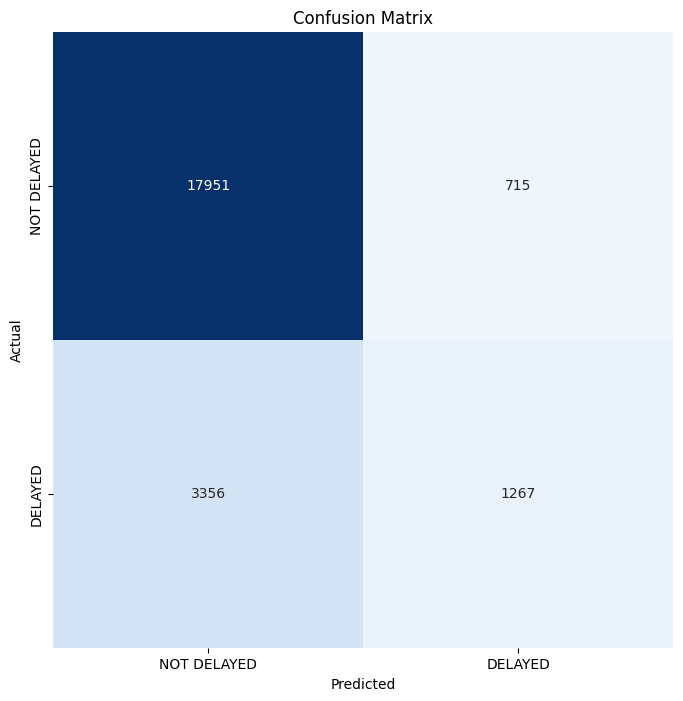

Classification Repor for Decision Tree Classifier :
----------------------
               precision    recall  f1-score   support

 NOT DELAYED       0.84      0.96      0.90     18666
     DELAYED       0.64      0.27      0.38      4623

    accuracy                           0.83     23289
   macro avg       0.74      0.62      0.64     23289
weighted avg       0.80      0.83      0.80     23289



In [53]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(X_train, y_train)
model_acc = model.score(X_valid, y_valid)
print("Test Accuracy: {:.2f}%".format(model_acc * 100))

y_true = np.array(y_valid)
y_pred = model.predict(X_valid)

cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=["NOT DELAYED", "DELAYED"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Repor for Decision Tree Classifier :\n----------------------\n", clr)

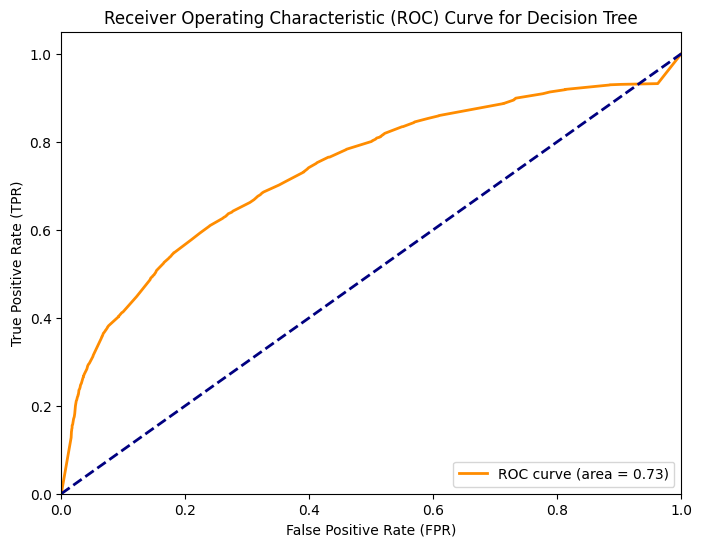

In [36]:
# Predict probabilities for ROC curve
y_probs_dt = model .predict_proba(X_valid)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_valid, y_probs_dt)

# Calculate AUC for Decision Tree
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC  curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

**Random Forest Classifier**

Random Forest Validation Accuracy: 83.97%


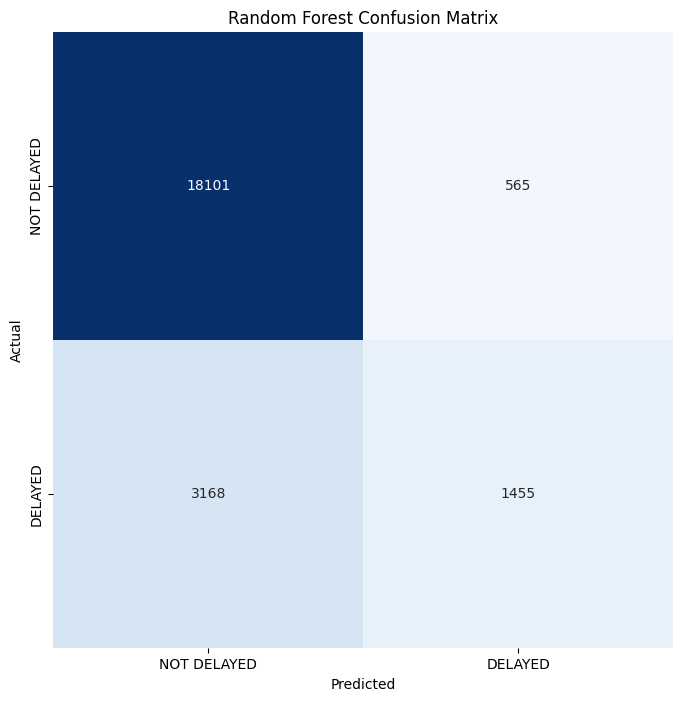

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

 NOT DELAYED       0.85      0.97      0.91     18666
     DELAYED       0.72      0.31      0.44      4623

    accuracy                           0.84     23289
   macro avg       0.79      0.64      0.67     23289
weighted avg       0.83      0.84      0.81     23289



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_acc = rf_model.score(X_valid, y_valid)
print("Random Forest Validation Accuracy: {:.2f}%".format(rf_acc * 100))

y_true = np.array(y_valid)
y_pred = rf_model.predict(X_valid)

rf_cm = confusion_matrix(y_true, y_pred)
rf_clr = classification_report(y_true, y_pred, target_names=["NOT DELAYED", "DELAYED"])

plt.figure(figsize=(8, 8))
sns.heatmap(rf_cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Random Forest Classification Report:\n----------------------\n", rf_clr)


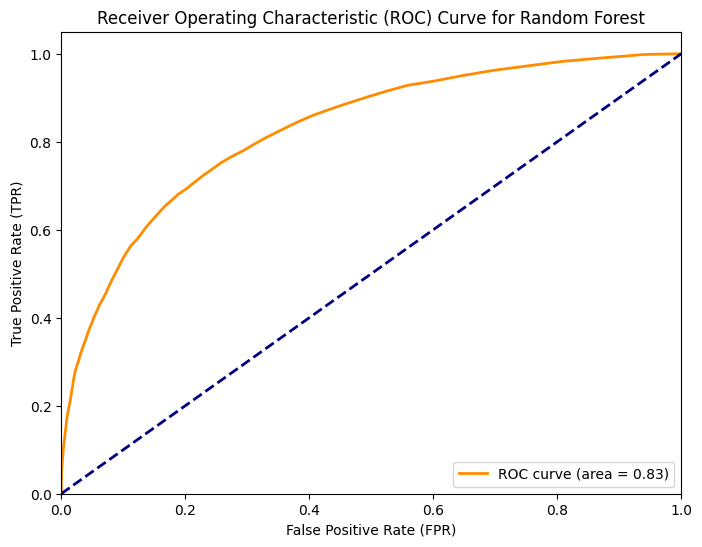

In [38]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_probs_rf = rf_model.predict_proba(X_valid)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid, y_probs_rf)

# Calculate AUC for Random Forest
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()



**Logistic Regression Classifier**


Classification Report for Logistic Regrssion:
              precision    recall  f1-score   support

 NOT DELAYED       0.83      0.97      0.89     18666
     DELAYED       0.60      0.17      0.27      4623

    accuracy                           0.81     23289
   macro avg       0.71      0.57      0.58     23289
weighted avg       0.78      0.81      0.77     23289


Accuracy: 0.81


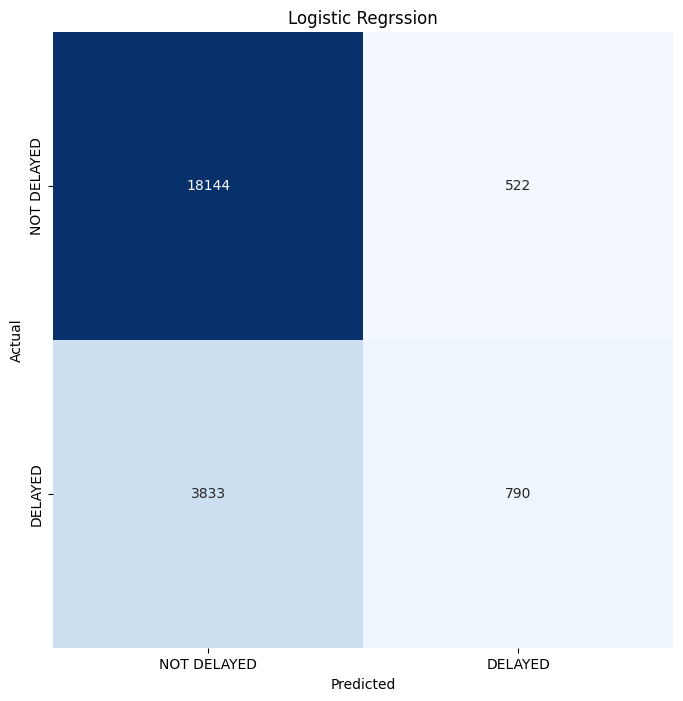

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_valid are your training and validation set features respectively
# Assuming y_train, y_valid are your training and validation set labels respectively

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Initialize Logistic Regression model with increased max_iter
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Fit model on scaled training data
logreg.fit(X_train_scaled, y_train)

# Predict on scaled validation data
y_pred = logreg.predict(X_valid_scaled)



plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.yticks(np.arange(2) + 0.5, ["NOT DELAYED", "DELAYED"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regrssion")
# Compute classification report
clr = classification_report(y_valid, y_pred, target_names=["NOT DELAYED", "DELAYED"])
print("\nClassification Report for Logistic Regrssion:")
print(clr)

# Compute accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


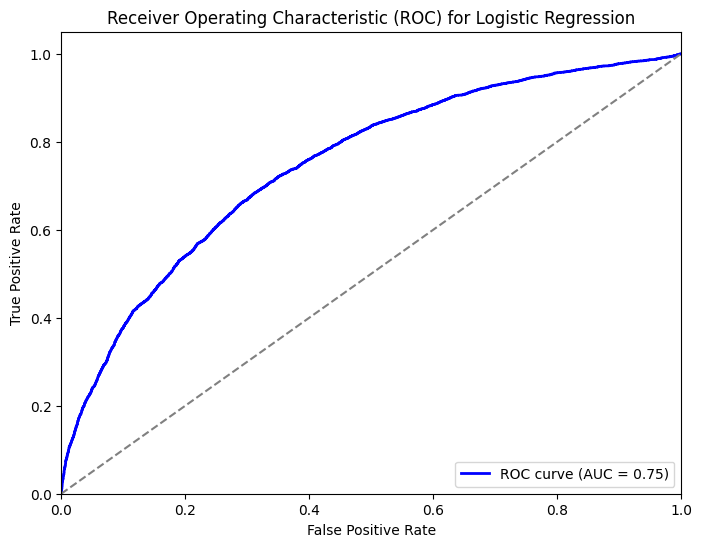

In [50]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_valid_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.legend(loc='lower right')
plt.show()




**KNNeighbors Classifier**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
model_knn.fit(X_train, y_train)

# Evaluate the model
accuracy_knn = model_knn.score(X_valid, y_valid)
print(f"KNN Validation Accuracy: {accuracy_knn:.2f}")

# Confusion Matrix
y_pred_knn = model_knn.predict(X_valid)
cm_knn = confusion_matrix(y_valid, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

# Classification Report
clr_knn = classification_report(y_valid, y_pred_knn)
print("Classification Report for KNN:")
print(clr_knn)


KNN Validation Accuracy: 0.80
Confusion Matrix:
[[17575  1091]
 [ 3464  1159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     18666
           1       0.52      0.25      0.34      4623

    accuracy                           0.80     23289
   macro avg       0.68      0.60      0.61     23289
weighted avg       0.77      0.80      0.78     23289



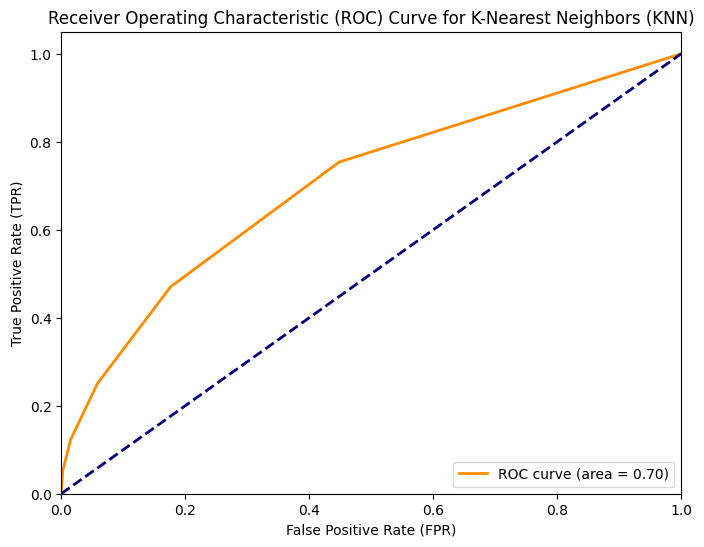

In [47]:
# Predict probabilities for ROC curve
y_probs_knn = model_knn.predict_proba(X_valid)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_valid, y_probs_knn)

# Calculate AUC for KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for K-Nearest Neighbors (KNN)')
plt.legend(loc="lower right")
plt.show()

**Naive Bayes**

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the Gaussian Naive Bayes model
model_nb = GaussianNB()

# Train the model
model_nb.fit(X_train, y_train)

# Evaluate the model
accuracy_nb = model_nb.score(X_valid, y_valid)
print(f"Gaussian Naive Bayes Validation Accuracy: {accuracy_nb:.2f}")

# Confusion Matrix
y_pred_nb = model_nb.predict(X_valid)
cm_nb = confusion_matrix(y_valid, y_pred_nb)
print("Confusion Matrix:")
print(cm_nb)

# Classification Report
clr_nb = classification_report(y_valid, y_pred_nb)
print("Classification Report:")
print(clr_nb)


Gaussian Naive Bayes Validation Accuracy: 0.56
Confusion Matrix:
[[9900 8766]
 [1587 3036]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.53      0.66     18666
           1       0.26      0.66      0.37      4623

    accuracy                           0.56     23289
   macro avg       0.56      0.59      0.51     23289
weighted avg       0.74      0.56      0.60     23289



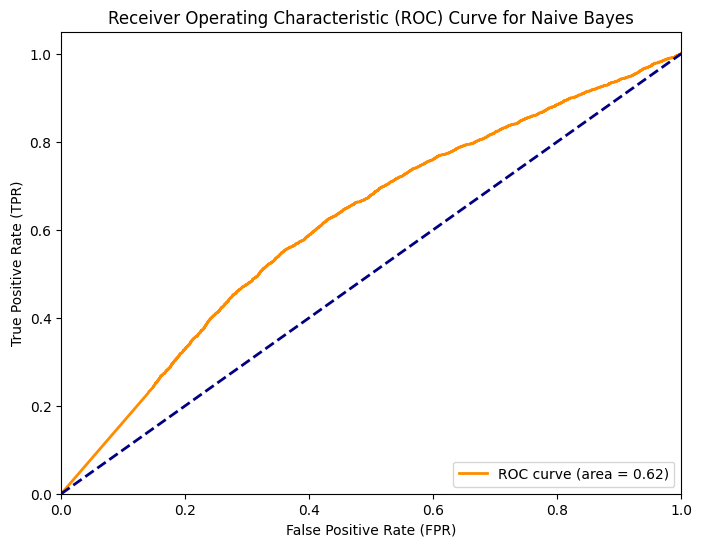

In [49]:

# Predict probabilities for ROC curve
y_probs_nb = model_nb.predict_proba(X_valid)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_valid, y_probs_nb)

# Calculate AUC for Naive Bayes
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


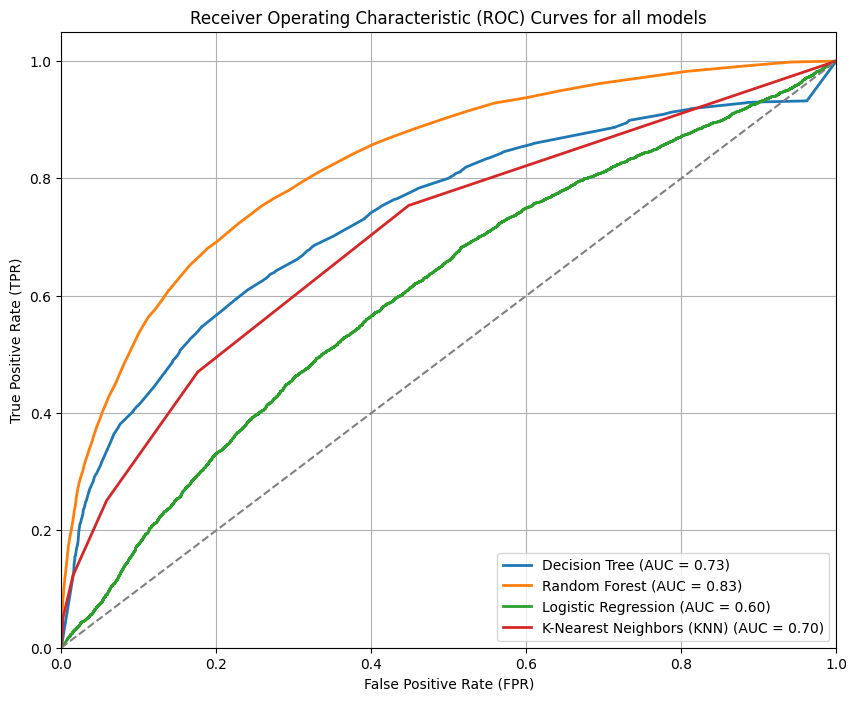

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted for multiple models
models = {
    'Decision Tree': (model, X_valid),
    'Random Forest': (rf_model, X_valid),
    'Logistic Regression': (logreg, X_valid_scaled),
    'K-Nearest Neighbors (KNN)': (model_knn, X_valid)
}

plt.figure(figsize=(10, 8))
for model_name, (model, X_data) in models.items():
    if model_name == 'Logistic Regression':
        # Scale the data for Logistic Regression
        X_data_scaled = scaler.transform(X_data)
        y_probs = model.predict_proba(X_data_scaled)[:, 1]
    else:
        y_probs = model.predict_proba(X_data)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_valid, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random guessing line (baseline)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves for all models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
